## Stratified K-Fold Cross Validation (OOP)

In [10]:
import os
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from src.k_fold.stratified_k_fold import KFoldModelTrainer
from src.processing import data_augmentation

In [3]:
sys.path.append('/home/bilgecan_cihan/audio-predictive-maintenance/data_science')
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [5]:
# generate LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(173, 40)))  # (X_train.shape[1], X_train.shape[2])
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 104,330
Trainable params: 104,330
Non-trainable params: 0
_________________________________________________________________


In [6]:
# load processed data and initialize kf object
kf = KFoldModelTrainer(fold=5)

/home/bilgecan_cihan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
# investigate total samples at each fold
kf.create_kfold_data(input_RNN=True)

> Fold 1, Train: 0=798, 1=162, 2=780, 3=540, 4=644, 5=768, 6=13, 7=644, 8=718, 9=800,                  
  Fold 1, Test: 0=199, 1=41, 2=196, 3=135, 4=161, 5=193, 6=3, 7=160, 8=179, 9=200

> Fold 2, Train: 0=797, 1=162, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=718, 9=800,                  
  Fold 2, Test: 0=200, 1=41, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=179, 9=200

> Fold 3, Train: 0=797, 1=162, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=718, 9=800,                  
  Fold 3, Test: 0=200, 1=41, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=179, 9=200

> Fold 4, Train: 0=798, 1=163, 2=781, 3=540, 4=644, 5=769, 6=12, 7=643, 8=717, 9=800,                  
  Fold 4, Test: 0=199, 1=40, 2=195, 3=135, 4=161, 5=192, 6=4, 7=161, 8=180, 9=200

> Fold 5, Train: 0=798, 1=163, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=717, 9=800,                  
  Fold 5, Test: 0=199, 1=40, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=180, 9=200



In [8]:
# generate a dictionary with all folds and compile
kf.initialize_model(model)

In [11]:
# start training
kf.train_models(input_RNN=True,
                batch_size=256,
                epochs=1000,
                patience=50,
                early_stop=True,
                data_augmentation_function=data_augmentation.apply_noise_batch)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/1000
46/46 [==============================] - 1s 29ms/step - loss: 1.8657 - accuracy: 0.3102 - val_loss: 1.4614 - val_accuracy: 0.5106
Epoch 2/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.4115 - accuracy: 0.4960 - val_loss: 1.1711 - val_accuracy: 0.5958
Epoch 3/1000
46/46 [==============================] - 1s 21ms/step - loss: 1.1909 - accuracy: 0.5828 - val_loss: 0.9948 - val_accuracy: 0.6803
Epoch 4/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.0222 - accuracy: 0.6514 - val_loss: 0.8839 - val_accuracy: 0.7212
Epoch 5/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.8758 - accuracy: 0.7071 - val_loss: 0.7838 - val_accuracy: 0.7382
Epoch 6/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.7821 - accuracy: 0.7361 - val_loss: 0.7182 - val_accuracy: 0.7594
Epoch 7/1000
46/46 [=========================

46/46 [==============================] - 1s 22ms/step - loss: 0.0854 - accuracy: 0.9707 - val_loss: 0.4136 - val_accuracy: 0.8882
Epoch 58/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0812 - accuracy: 0.9740 - val_loss: 0.4075 - val_accuracy: 0.8909
Epoch 59/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0841 - accuracy: 0.9705 - val_loss: 0.4714 - val_accuracy: 0.8807
Epoch 60/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0839 - accuracy: 0.9706 - val_loss: 0.4374 - val_accuracy: 0.8862
Epoch 61/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0786 - accuracy: 0.9727 - val_loss: 0.4578 - val_accuracy: 0.8889
Epoch 62/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0772 - accuracy: 0.9743 - val_loss: 0.4137 - val_accuracy: 0.8964
Epoch 63/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0769 - accuracy: 0.9727 - val_loss: 0.4457 - val_accuracy: 0.8909
Epoch 

Epoch 114/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0413 - accuracy: 0.9861 - val_loss: 0.4740 - val_accuracy: 0.9032
Epoch 115/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.4434 - val_accuracy: 0.9073
Epoch 116/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0338 - accuracy: 0.9884 - val_loss: 0.4963 - val_accuracy: 0.8950
Epoch 117/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.4996 - val_accuracy: 0.9046
Epoch 118/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.4636 - val_accuracy: 0.9012
Epoch 119/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0363 - accuracy: 0.9868 - val_loss: 0.4822 - val_accuracy: 0.8916
Epoch 120/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0426 - accuracy: 0.9850 - val_loss: 0.4622 - val_ac

46/46 [==============================] - 1s 22ms/step - loss: 0.3224 - accuracy: 0.8894 - val_loss: 0.5380 - val_accuracy: 0.8275
Epoch 15/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.3155 - accuracy: 0.8882 - val_loss: 0.5566 - val_accuracy: 0.8166
Epoch 16/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2975 - accuracy: 0.8958 - val_loss: 0.5441 - val_accuracy: 0.8194
Epoch 17/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.2749 - accuracy: 0.9026 - val_loss: 0.5441 - val_accuracy: 0.8166
Epoch 18/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2619 - accuracy: 0.9068 - val_loss: 0.5566 - val_accuracy: 0.8207
Epoch 19/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2495 - accuracy: 0.9134 - val_loss: 0.5607 - val_accuracy: 0.8228
Epoch 20/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2417 - accuracy: 0.9157 - val_loss: 0.5501 - val_accuracy: 0.8275
Epoch 

Epoch 71/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0645 - accuracy: 0.9784 - val_loss: 0.5817 - val_accuracy: 0.8725
Epoch 72/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0641 - accuracy: 0.9784 - val_loss: 0.6066 - val_accuracy: 0.8664
Epoch 73/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0695 - accuracy: 0.9743 - val_loss: 0.6085 - val_accuracy: 0.8555
Epoch 74/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0656 - accuracy: 0.9778 - val_loss: 0.6148 - val_accuracy: 0.8650
Epoch 75/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0628 - accuracy: 0.9790 - val_loss: 0.6078 - val_accuracy: 0.8643
Epoch 76/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0652 - accuracy: 0.9778 - val_loss: 0.5911 - val_accuracy: 0.8623
Epoch 77/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0570 - accuracy: 0.9795 - val_loss: 0.6065 - val_accuracy:

Epoch 128/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0357 - accuracy: 0.9877 - val_loss: 0.6554 - val_accuracy: 0.8630
Epoch 129/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0412 - accuracy: 0.9852 - val_loss: 0.7199 - val_accuracy: 0.8664
Epoch 130/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.6740 - val_accuracy: 0.8691
Epoch 131/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.6299 - val_accuracy: 0.8746
Epoch 132/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.6425 - val_accuracy: 0.8712
Epoch 133/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0310 - accuracy: 0.9884 - val_loss: 0.7003 - val_accuracy: 0.8664
Epoch 134/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.6870 - val_ac

46/46 [==============================] - 1s 22ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.7136 - val_accuracy: 0.8766
Epoch 185/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0194 - accuracy: 0.9930 - val_loss: 0.6854 - val_accuracy: 0.8759
Epoch 186/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.7459 - val_accuracy: 0.8698
Epoch 187/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0269 - accuracy: 0.9922 - val_loss: 0.7293 - val_accuracy: 0.8739
Epoch 188/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0379 - accuracy: 0.9872 - val_loss: 0.6810 - val_accuracy: 0.8705
Epoch 189/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0884 - accuracy: 0.9736 - val_loss: 0.6820 - val_accuracy: 0.8534
Epoch 190/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0660 - accuracy: 0.9778 - val_loss: 0.6555 - val_accuracy: 0.8671


46/46 [==============================] - 1s 21ms/step - loss: 0.4797 - accuracy: 0.8345 - val_loss: 0.6333 - val_accuracy: 0.7866
Epoch 9/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.4404 - accuracy: 0.8500 - val_loss: 0.6270 - val_accuracy: 0.7860
Epoch 10/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.4234 - accuracy: 0.8563 - val_loss: 0.6129 - val_accuracy: 0.7900
Epoch 11/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.3909 - accuracy: 0.8627 - val_loss: 0.6433 - val_accuracy: 0.7853
Epoch 12/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.3681 - accuracy: 0.8716 - val_loss: 0.6087 - val_accuracy: 0.8016
Epoch 13/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.3429 - accuracy: 0.8786 - val_loss: 0.6259 - val_accuracy: 0.7907
Epoch 14/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.3234 - accuracy: 0.8896 - val_loss: 0.6294 - val_accuracy: 0.7941
Epoch 1

Epoch 65/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0730 - accuracy: 0.9757 - val_loss: 0.6740 - val_accuracy: 0.8391
Epoch 66/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0712 - accuracy: 0.9753 - val_loss: 0.6938 - val_accuracy: 0.8357
Epoch 67/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0681 - accuracy: 0.9769 - val_loss: 0.6709 - val_accuracy: 0.8398
Epoch 68/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0721 - accuracy: 0.9746 - val_loss: 0.7001 - val_accuracy: 0.8487
Epoch 69/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0687 - accuracy: 0.9767 - val_loss: 0.7622 - val_accuracy: 0.8337
Epoch 70/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0749 - accuracy: 0.9721 - val_loss: 0.6664 - val_accuracy: 0.8480
Epoch 71/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0676 - accuracy: 0.9754 - val_loss: 0.7278 - val_accuracy:

Epoch 122/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.7255 - val_accuracy: 0.8569
Epoch 123/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.7020 - val_accuracy: 0.8521
Epoch 124/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.7428 - val_accuracy: 0.8562
Epoch 125/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0334 - accuracy: 0.9880 - val_loss: 0.7369 - val_accuracy: 0.8562
Epoch 126/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.7303 - val_accuracy: 0.8603
Epoch 127/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.6973 - val_accuracy: 0.8596
Epoch 128/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0315 - accuracy: 0.9892 - val_loss: 0.7769 - val_ac

46/46 [==============================] - 1s 22ms/step - loss: 0.0432 - accuracy: 0.9859 - val_loss: 0.7694 - val_accuracy: 0.8582
Epoch 179/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0337 - accuracy: 0.9886 - val_loss: 0.7473 - val_accuracy: 0.8575
Epoch 180/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.7270 - val_accuracy: 0.8650
Epoch 181/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.7341 - val_accuracy: 0.8534
Epoch 182/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.6744 - val_accuracy: 0.8705
Epoch 183/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0239 - accuracy: 0.9914 - val_loss: 0.6856 - val_accuracy: 0.8650
Epoch 184/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0198 - accuracy: 0.9930 - val_loss: 0.7012 - val_accuracy: 0.8766


46/46 [==============================] - 1s 22ms/step - loss: 0.0280 - accuracy: 0.9906 - val_loss: 0.7986 - val_accuracy: 0.8664
Epoch 235/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.8082 - val_accuracy: 0.8671
Epoch 236/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0263 - accuracy: 0.9907 - val_loss: 0.7844 - val_accuracy: 0.8759
Epoch 237/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0235 - accuracy: 0.9920 - val_loss: 0.7753 - val_accuracy: 0.8807
Epoch 238/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.7732 - val_accuracy: 0.8773
Epoch 239/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0217 - accuracy: 0.9921 - val_loss: 0.6983 - val_accuracy: 0.8800
Epoch 240/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.8506 - val_accuracy: 0.8746


46/46 [==============================] - 1s 21ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.8420 - val_accuracy: 0.8691
Epoch 291/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.8007 - val_accuracy: 0.8671
Epoch 292/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.8690 - val_accuracy: 0.8623
Epoch 293/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.7791 - val_accuracy: 0.8698
Epoch 294/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.7962 - val_accuracy: 0.8705
Epoch 295/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0243 - accuracy: 0.9911 - val_loss: 0.8163 - val_accuracy: 0.8698
Epoch 296/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.7259 - val_accuracy: 0.8746


Epoch 45/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1010 - accuracy: 0.9644 - val_loss: 0.5430 - val_accuracy: 0.8650
Epoch 46/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1016 - accuracy: 0.9658 - val_loss: 0.5594 - val_accuracy: 0.8623
Epoch 47/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0966 - accuracy: 0.9673 - val_loss: 0.5519 - val_accuracy: 0.8678
Epoch 48/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0976 - accuracy: 0.9667 - val_loss: 0.6055 - val_accuracy: 0.8650
Epoch 49/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0944 - accuracy: 0.9677 - val_loss: 0.5550 - val_accuracy: 0.8712
Epoch 50/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0890 - accuracy: 0.9705 - val_loss: 0.5647 - val_accuracy: 0.8691
Epoch 51/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0878 - accuracy: 0.9683 - val_loss: 0.5779 - val_accuracy:

Epoch 102/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0450 - accuracy: 0.9837 - val_loss: 0.6245 - val_accuracy: 0.8834
Epoch 103/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.6648 - val_accuracy: 0.8780
Epoch 104/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0424 - accuracy: 0.9851 - val_loss: 0.6378 - val_accuracy: 0.8848
Epoch 105/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.6638 - val_accuracy: 0.8705
Epoch 106/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0407 - accuracy: 0.9849 - val_loss: 0.6541 - val_accuracy: 0.8828
Epoch 107/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.6466 - val_accuracy: 0.8807
Epoch 108/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0377 - accuracy: 0.9867 - val_loss: 0.6591 - val_ac

46/46 [==============================] - 1s 23ms/step - loss: 0.0311 - accuracy: 0.9886 - val_loss: 0.6924 - val_accuracy: 0.8814
Epoch 159/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.6672 - val_accuracy: 0.8848
Epoch 160/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0356 - accuracy: 0.9881 - val_loss: 0.7149 - val_accuracy: 0.8691
Epoch 161/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.6627 - val_accuracy: 0.8834
Epoch 162/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.7464 - val_accuracy: 0.8875
Epoch 163/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.7945 - val_accuracy: 0.8725
Epoch 164/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0354 - accuracy: 0.9874 - val_loss: 0.7564 - val_accuracy: 0.8766


46/46 [==============================] - 1s 22ms/step - loss: 0.0206 - accuracy: 0.9924 - val_loss: 0.7735 - val_accuracy: 0.8855
Epoch 215/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.6969 - val_accuracy: 0.8848
Epoch 216/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.7286 - val_accuracy: 0.8882
Epoch 00216: early stopping
46/46 [==============================] - 0s 8ms/step - loss: 0.7286 - accuracy: 0.8882
Testing scores for fold 4:                 loss of 0.7285986542701721;                 accuracy of 88.8207197189331%
Training completed in time:  0:03:46.073490
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/1000
46/46 [==============================] - 1s 30ms/step - loss: 1.5802 - accuracy: 0.4183 - val_loss: 1.2375 - val_accuracy: 0.5498
Epoch 2/1000
46/46 [==============================] - 1s 23ms/st

Epoch 52/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0949 - accuracy: 0.9667 - val_loss: 0.6047 - val_accuracy: 0.8527
Epoch 53/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0924 - accuracy: 0.9676 - val_loss: 0.5846 - val_accuracy: 0.8513
Epoch 54/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0935 - accuracy: 0.9683 - val_loss: 0.6141 - val_accuracy: 0.8554
Epoch 55/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0795 - accuracy: 0.9743 - val_loss: 0.6053 - val_accuracy: 0.8554
Epoch 56/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0922 - accuracy: 0.9698 - val_loss: 0.5939 - val_accuracy: 0.8622
Epoch 57/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0964 - accuracy: 0.9657 - val_loss: 0.6015 - val_accuracy: 0.8561
Epoch 58/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0859 - accuracy: 0.9713 - val_loss: 0.6053 - val_accuracy:

Epoch 109/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0419 - accuracy: 0.9859 - val_loss: 0.6996 - val_accuracy: 0.8547
Epoch 110/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0513 - accuracy: 0.9824 - val_loss: 0.7000 - val_accuracy: 0.8547
Epoch 111/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0728 - accuracy: 0.9774 - val_loss: 0.7381 - val_accuracy: 0.8492
Epoch 112/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0757 - accuracy: 0.9744 - val_loss: 0.6137 - val_accuracy: 0.8622
Epoch 113/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0506 - accuracy: 0.9828 - val_loss: 0.6403 - val_accuracy: 0.8683
Epoch 114/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.6714 - val_accuracy: 0.8731
Epoch 115/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.6729 - val_ac

In [12]:
# evaluate
kf.post_train_eval()

------------------------------------------------------------------------
Score per fold

> Fold 1 - Loss: 0.0009                 - Training Accuracy: 100.0000 %
> Fold 1 - Loss: 0.4707                 - Testing Accuracy: 90.7975 %

> Fold 2 - Loss: 0.0010                 - Training Accuracy: 99.9915 %
> Fold 2 - Loss: 0.7377                 - Testing Accuracy: 88.4117 %

> Fold 3 - Loss: 0.0005                 - Training Accuracy: 100.0000 %
> Fold 3 - Loss: 0.7607                 - Testing Accuracy: 87.7982 %

> Fold 4 - Loss: 0.0022                 - Training Accuracy: 99.9830 %
> Fold 4 - Loss: 0.7286                 - Testing Accuracy: 88.8207 %

> Fold 5 - Loss: 0.0024                 - Training Accuracy: 99.9830 %
> Fold 5 - Loss: 0.6616                 - Testing Accuracy: 86.3574 %

------------------------------------------------------------------------
Average scores for all folds:

> Training Accuracy: 99.9915 %             (+- 0.0076)
> Testing Accuracy: 88.4371 %           

 Plots for Model 1


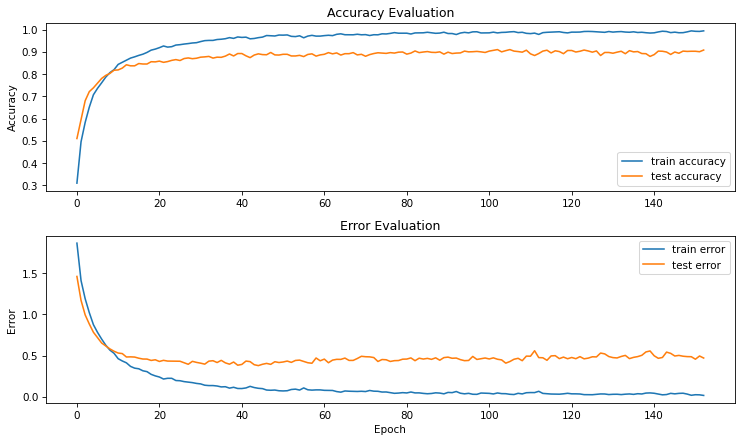

 Plots for Model 2


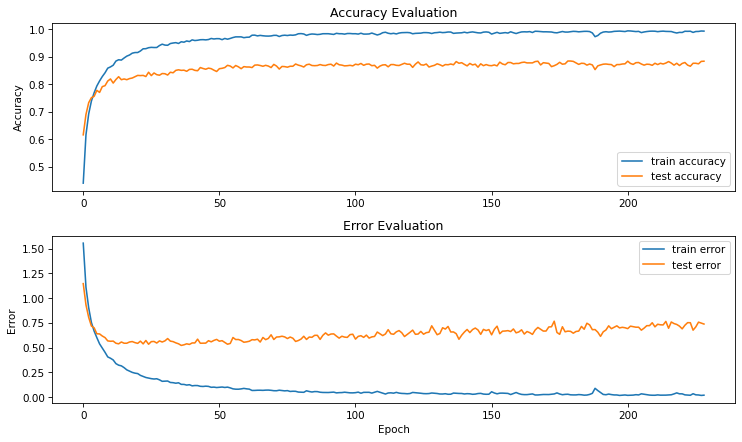

 Plots for Model 3


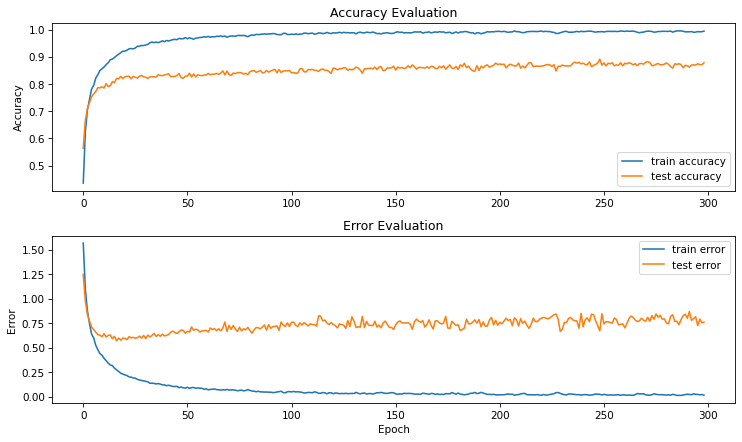

 Plots for Model 4


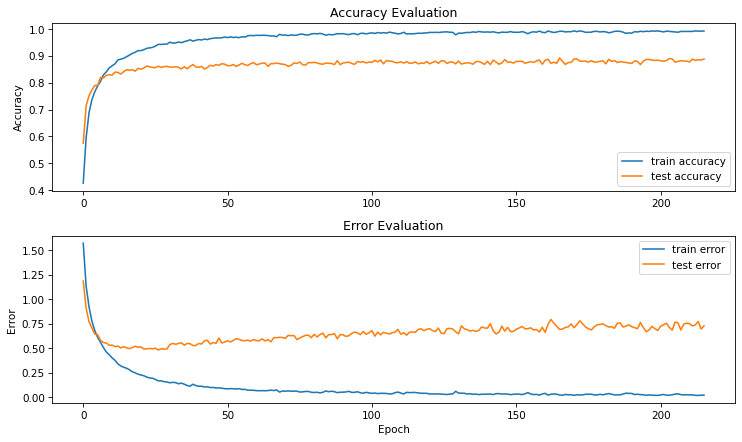

 Plots for Model 5


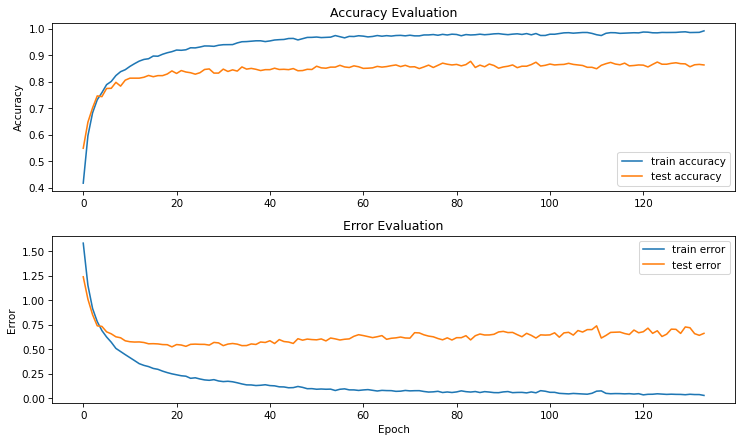

In [13]:
# plot accuracies and errors
kf.plot_histories()

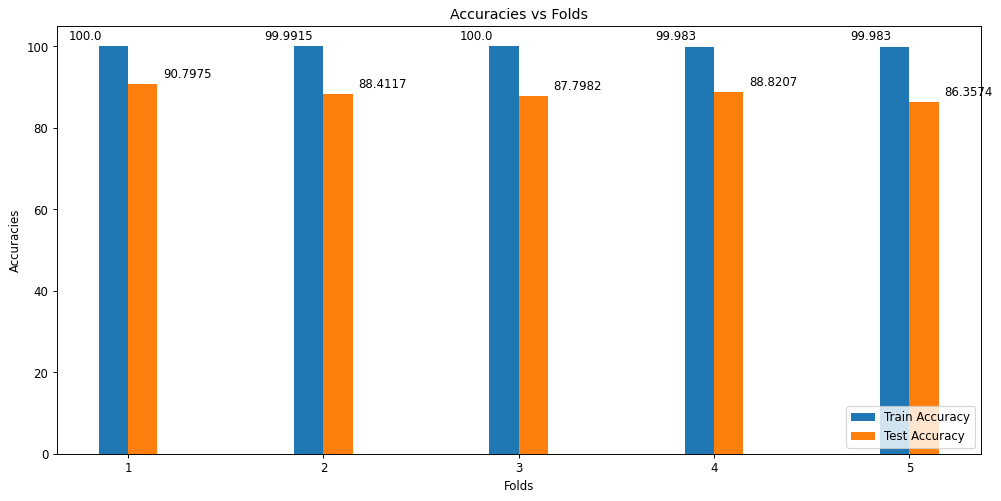

In [14]:
# accuracies of each fold
kf.plot_accuracies_vs_folds()

* Models are already saved, skip below.

In [ ]:
# save all folds (default path is for lstm)
kf.save_all_models(path="data_science/models/lstm_k_fold/saved_model_")

In [ ]:
# save best fold (here, fold 1)
kf.save_best_model(best_fold=1, path="data_science/models/lstm_k_fold/best_model")